In [306]:
import numpy as np
import itertools

def expectation(domains,ProbTable,func):
    """
    @domains: List of Lists, each list corresponding to domain of a random variable
    @ProbTable np.ndarray, ith index corresponding to ith list in domains
    @func function that will be applied
    """
    Fx=0
    indexes = map(lambda x: range(len(x)), domains)
    domains_np=np.array(domains)
    table_indexes = list(itertools.product(*indexes)) 
    for ind in (table_indexes):
        x= map(lambda x: domains_np[x][ind[x]],range(len(ind))) 
        Fx=Fx+func(x)*ProbTable[ind]
    return Fx
def cond_expectations(domains,ProbTable,func,givens):
    """
    @domains: List of Lists, each list corresponding to domain of a random variable
    @ProbTable np.ndarray, ith index corresponding to ith list in domains
    @func function that will be applied
    @given List corresponding to domains
    """
    given_prob = probability_table
    for i in range(len(domain)):
        if i not in givens:
            given_prob = np.sum(given_prob,axis=i,keepdims=True)

    p_given = np.divide(probability_table,given_prob)
    
    indexes = map(lambda x: range(len(domains[x])) if x in givens else [(range(len(domains[x])))] ,range(len(domain)) )
    table_indexes = list(itertools.product(*indexes)) 
    
    domains_new=list()
    for i in range(len(domains)):
        if i not in givens:
            domains_new.append(domains[i])
    table_indexes2 = list(itertools.product(*domains_new)) 
    Fx=list()
    for ind in range(len(table_indexes)):
        Fx.append(expectation(domains_new,p_given[table_indexes[ind]],func))
#     for i in range(len(table_indexes)):
#         print i
    return Fx
        
def variance(domains,ProbTable,func):
    """
    @domains: List of Lists, each list corresponding to domain of a random variable
    @ProbTable np.ndarray, ith index corresponding to ith list in domains
    @func function that will be applied
    """
    exp=expectation(domains,ProbTable,func)
    func2=lambda x: (func(x)-exp)**2
    var = expectation(domains,ProbTable,func2)
    return var
def covariance(domains,ProbTable,func,func2):
    """
    @domains: List of Lists, each list corresponding to domain of a random variable
    @ProbTable np.ndarray, ith index corresponding to ith list in domains
    @func function that will be applied
    """
    exp1=expectation(domains,ProbTable,func)
    exp2=expectation(domains,ProbTable,func2)
    func3=lambda x: (func(x)-exp1)*(func2(x)-exp2)
    var = expectation(domains,ProbTable,func3)
    return var

In [433]:
domains=[[1.0,2.0],[-1.0,0.0,5.0]]
probability_table=np.array([[0.3,0.3,0],[0.1,0.2,0.1]])
func=lambda x: x[0]

# 1.) Expectations

In [435]:
print '<x>',expectation(domains,probability_table,lambda x: x[0])
print '<y>',expectation(domains,probability_table,lambda x: x[1])
print '<y|x>',cond_expectations(domains,probability_table,func,[0,])
print '<x|y>',cond_expectations(domains,probability_table,func,[1,])
print 'cov(x,y)',covariance(domains,probability_table,lambda x: x[0],lambda x: x[1])

<x> 1.4000000000000001
<y> 0.09999999999999998
<y|x> [-0.5, 1.0]
<x|y> [1.25, 1.4, 2.0]
cov(x,y) 0.36000000000000004


# Entropy

In [436]:
def entropy(domains,probability_table):
    indexes = map(lambda x: range(len(x)), domains)
    domains_np=np.array(domains)
    table_indexes = list(itertools.product(*indexes))
    probability_table_dict={}
    for ind in (table_indexes):
        x= map(lambda x: domains_np[x][ind[x]],range(len(ind)))
        probability_table_dict[tuple(x)] = probability_table[ind]
    z=-expectation(domains,probability_table,lambda x: np.log(probability_table_dict[tuple(x)]) if probability_table_dict[tuple(x)]>0 else 0)
    return z
def cond_entropy(domains,probability_table,givens):
    given_prob = probability_table
    for i in range(len(domain)):
        if i not in givens:
            given_prob = np.sum(given_prob,axis=i,keepdims=True)
    for i in range(len(domain)):
        if i not in givens:
            given_prob = np.sum(given_prob,axis=i,keepdims=True)
    p_given = np.divide(probability_table,given_prob)
    
    indexes = map(lambda x: range(len(domains[x])) if x in givens else [(range(len(domains[x])))] ,range(len(domain)) )
    table_indexes = list(itertools.product(*indexes)) 
    
    domains_new=list()
    for i in range(len(domains)):
        if i not in givens:
            domains_new.append(domains[i])
    table_indexes2 = list(itertools.product(*domains_new)) 
    
    Fx=list()
    for ind in range(len(table_indexes)):
        Fx.append(entropy(domains_new,p_given[table_indexes[ind]]))
    return np.array(Fx).reshape(-1).dot(given_prob.reshape(-1))

## 2-3-4


In [437]:
Hxy = entropy(domains,probability_table)
Hx = entropy([domains[0]],np.sum(probability_table,axis=1))
Hy = entropy([domains[1]],np.sum(probability_table,axis=0))
Hy_x = cond_entropy(domains,probability_table,[0,])
Hx_y = cond_entropy(domains,probability_table,[1,])
print 'H[x, y]',Hxy
print 'H[x]',Hx
print 'H[y]',Hy
print 'H[y|x]',Hy_x
print 'H[x|y]',Hx_y

H[x, y] 1.5047882836811908
H[x] 0.6730116670092565
H[y] 0.9433483923290391
H[y|x] 0.8317766166719344
H[x|y] 0.5614398913521517


# Mutual Information

In [438]:
# Works for nd=2 case
def mutualInfo(domains,probability_table,x):
    H= entropy([domains[x]],np.sum(probability_table,axis=1-x))
    H_=cond_entropy(domains,probability_table,[1-x,])
    return H-H_

# 5

In [439]:
Ixy=mutualInfo(domains,probability_table,0)
print 'I(x,y)',Ixy

I(x,y) 0.11157177565710485


# 7

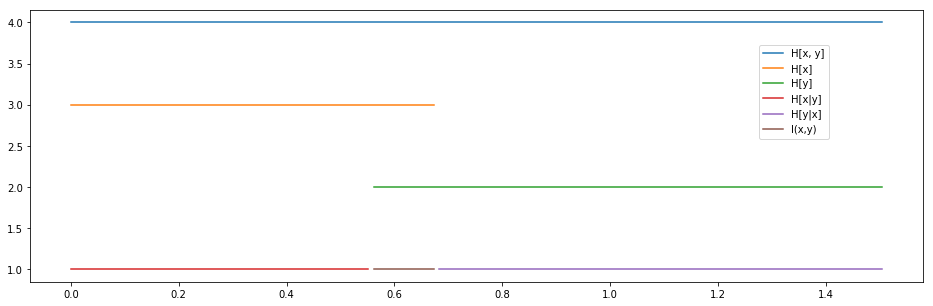

In [440]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.plot([0,Hxy],[4,4])
plt.plot([0,Hx],[3,3])
plt.plot([Hxy-Hy,Hxy],[2,2])
plt.plot([0,Hx_y-0.01],[1,1])# Subtracted 0.01 to show seperation
plt.plot([Hxy-Hy_x+0.01,Hxy],[1,1]) # Added 0.01 to show seperation
plt.plot([Hx_y,Hx_y+Ixy],[1,1])
plt.legend(['H[x, y]','H[x]','H[y]','H[x|y]','H[y|x]','I(x,y)'],loc=5,bbox_to_anchor=(0.9,0.7, 0, 0))
plt.show()